# TP 2: Équation de la chaleur en 1D

On s'intéresse à la résolution numérique de l'équation de la chaleur sur $[0,T]\times [0,1]$ avec une conductivité thermique $a\in \mathcal{C}^1([0,1]), a > 0$, et une source de chaleur continue, $f \in \mathcal{C}^0([0,1])$. On considèrera l'équation avec conditions de Dirichlet et de Neumann homogènes:

$$
(DD)\quad \left\{\begin{aligned}
&\frac{\partial u}{\partial t}(t,x) = \frac{\partial}{\partial x}\left(a(x) \frac{\partial u}{\partial x}(t,x)\right) + f(x)  \hbox{ sur } ]0,1[\times ]0,T]\\
&u(t,0) = u(t,1) = 0 \hbox{ pour } t\in [0,T]\\
&u(0,\cdot) = u_0
\end{aligned}\right. 
$$

$$
(DN)\quad \left\{\begin{aligned}
&\frac{\partial u}{\partial t}(x,t) = \frac{\partial}{\partial x}\left(a(x) \frac{\partial u}{\partial x}(x,t)\right) + f(x)  \hbox{ sur } ]0,1[\\
&\frac{\partial u}{\partial x}(t,0) = \frac{\partial u}{\partial x}(t,1) = 0 \hbox{ pour } t\in [0,T]\\
&u(0,\cdot) = u_0
\end{aligned}\right. 
$$

On commence par importer les modules et définir les fonctions $f$,$a$ et $u_0$:

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def f(x):
    fx = np.zeros(len(x))
    fx[np.logical_and(x>.8,x<.9)] = 1.
    return fx
def u0(x):
    fx = np.zeros(len(x))
    fx[x < .2] = 1.
    return fx


## 1. Cas de la conductivité constante
Dans cette partie, on s'intéresse au cas plus simple où la conductivité est constante, $a \equiv 1$.  On considère $x = (x_0,\dots,x_{M+1})$ une grille uniforme dans $[0,1]$ de pas $h=1/(M+1)$ et $t = (t_0,\dots,t_N)$ une grille uniforme dans $[0,T]$ de pas $\tau = 1/N$. On note également $u_{j}^n \simeq u(x_j,t_n)$ l'approximation discrète de la solution du système. Les schémas explicites et implicites pour l'équation de la chaleur avec conditions de Dirichlet s'écrivent:

$$
(DD,\mathrm{expl}) \quad \left\{\begin{aligned}
& \frac{1}{\tau} (u_{j}^{n+1} - u_j^n) = \frac{1}{h^2} (u_{j-1}^n - 2 u_j^{n} + u_{j+1}^n) + f_j &\hbox{ pour } 1\leq j \leq M, 0\leq n \leq N-1\\
& u_0^n = u_{M+1}^n = 0 &\hbox{ pour } 0\leq n\leq N \\
& u_j^0 = u_0(x_j) &\hbox{ pour } 1\leq j\leq M+1
\end{aligned}\right. 
$$

$$
(DD,\mathrm{impl}) \quad \left\{\begin{aligned}
& \frac{1}{\tau} (u_{j}^{n+1} - u_j^n) = \frac{1}{h^2} (u_{j-1}^{n+1} - 2 u_j^{n+1} + u_{j+1}^{n+1}) + f_j &\hbox{ pour } 1\leq j \leq M, 0\leq n \leq N-1\\
& u_0^n = u_{M+1}^n = 0 &\hbox{ pour } 0\leq n\leq N \\
& u_j^0 = u_0(x_j) &\hbox{ pour } 1\leq j\leq M+1
\end{aligned}\right. 
$$

On définit des schémas similaires $(DN,\mathrm{expl})$ et $(DN,\mathrm{impl})$ pour les conditions de Neumann. La forme discrète de la condition de Neumann $\frac{\partial u}{\partial x}(t,0) = \frac{\partial u}{\partial x} (t,1) = 0$ est donnée par $\frac{u_0^n - u_j^n}{\tau} = \frac{u_{M+1}^n - u_M^n}{\tau} = 0$.


**Q1)** En notant $\tilde{u}^n = (u_1^n,\dots,u^n_M)$ et $\tilde{f} = (f_1^n,\dots,u^n_M)$, montrer que les quatres schémas peuvent être mis sous forme matricielle:

$$\begin{aligned}
&\tilde{u}^{n+1} = \left(\mathrm{Id}_M + \frac{\tau}{h^2} L_{D} \right) \tilde{u}^n + \tau f  &\hbox{ pour  } (DD,\mathrm{expl})\\ 
& \tilde{u}^{n+1} = \left(\mathrm{Id}_M + \frac{\tau}{h^2} L_{N} \right) \tilde{u}^n + \tau f &\hbox{ pour  }
(DD,\mathrm{impl})\\ 
& \tilde{u}^{n+1} = \left(\mathrm{Id}_M - \frac{\tau}{h^2} L_{D} \right)^{-1} (\tilde{u}^n + \tau f) &\hbox{ pour  }
(DN,\mathrm{expl})\\ 
& \tilde{u}^{n+1} = \left(\mathrm{Id}_M - \frac{\tau}{h^2} L_{N} \right)^{-1} (\tilde{u}^n + \tau f) &\hbox{ pour  }
(DN,\mathrm{impl})
\end{aligned}$$

où les matrices $L_{D}$ (Dirichlet) et $L_N$ (Neumann) sont à déterminer.

**Q2)** Écrire deux fonctions $LD(M)$ et $LN(M)$ calculant ces matrices, *en ne faisant aucune boucle*. Pour cela, on s'aidera de la fonction np.diag (qui construit une matrice diagonale, sur-diagonale ou sous-diagonale à partir d'un vecteur) et/ou np.eye (matrice d'identité). Ne pas hésiter à faire appel à l'aide Python via *help(np.diag)*.


In [403]:
# compléter

**Q3)** Tracer sur une même figures les itérées pour $(DD,\mathrm{expl})$ pour $M=49$ et $N=500$ et $T=0.1$. Recommencer avec $N=498$. Calculer les valeurs propres de $L_D$ (via la fonction *np.linalg.eigvals*), et interpréter l'explosion constatée numériquement.

**Rappel: ** le produit matrice vecteur s'effectue via la fonction *np.dot(A,x)*


In [1]:
M = 49
N = 500
T = .1
h = 1.0/(M+1)
tau = T/N
#compléter


**Q4)** Démontrer que sous la condition $\frac{\tau}{h^2} \leq \frac{1}{2}$ et si $f=0$, la solution discrète vérifie le principe du maximum suivant:

$$\min_{0\leq j \leq M+1} u_j^n \leq \min_{0\leq j \leq M+1} u^{n+1}_j \hbox{ et } \max_{0\leq j \leq M+1}  u_j^{n+1} \leq \max_{0\leq j \leq M+1} u_j^n,$$

qui implique que $\|u^{n+1}\|_\infty \leq \|u^n\|_\infty$ et que le schéma $(DD,\mathrm{exp})$ est stable en norme infinie sous la condition $\frac{\tau}{h^2} \leq \frac{1}{2}$.

*(Indication: montrer que sous la condition mentionnée, $u^{n+1}_j$ est combinaison convexe de valeurs de $u^n$)*

**Q5)** Réaliser les mêmes calculs via la méthode implicite toujours pour les conditions de Dirichlet, en prenant $M=49$,  $N=50$, et $T=0.1$. Dans le cas où $f=0$, démontrer que la solution discrète vérifie un principe du maximum sans condition sur $(\tau,h)$, et que le schéma $(DD,\mathrm{impl})$ est  donc stable pour la norme infinie (on parle de *stabilité inconditionnelle*):

$$\min_{0\leq j \leq M+1} u_j^n \leq \min_{0\leq j \leq M+1} u^{n+1}_j \hbox{ et } \max_{0\leq j \leq M+1}  u_j^{n+1} \leq \max_{0\leq j \leq M+1} u_j^n.$$

*(Indication: pour la première inégalité, raisonner à partir de $j_0 = \arg\min_{j} u_j^{n+1}$)*

In [2]:
M = 49
N = 50
T = 0.1
h = 1.0/(M+1)
tau = T/N

#compléter

**Q6)** On s'intéresse maintenant à l'équation (DN) avec conditions de Neumann. Démontrer que si $u$ est une solution régulière de (DN), alors $\frac{d}{d t} \int_0^1 u(t,x) \mathrm{d} x = \int_{0}^1 f(x) \mathrm{d x}$, de sorte que la "source de chaleur" $f$ fait bien augmenter la température $u$ au cours du temps. Montrer que le vecteur $(1,\dots,1)$ appartient au noyau de $L_N$, et en déduire que la solution $(u^n)_{1\leq n\leq N}$ de $(DN)^{\mathrm{exp}}$,

$$\frac{1}{\tau} (\sum_{1\leq j\leq M} u^{n+1}_j - \sum_{1\leq j\leq M} u^{n}_j) = \sum_{1\leq j\leq M} f_j $$

Comparer numériquement l'effet des conditions de Neumann et de Dirichlet.

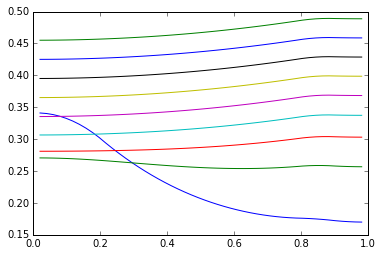

In [395]:
M = 50
N = 10
T = 3.0
h = 1.0/(M+1)
tau = T/N
#compléter



## 2. Cas de la conductivité variable

On s'intéresse à une équation de diffusion sans second membre ($f=0$) mais avec des conditions de Dirichlet non homogènes: 

$$
(DA) \quad \left\{\begin{aligned}
&\frac{\partial u}{\partial t}(t,x) = \frac{\partial}{\partial x}\left(a(x) \frac{\partial u}{\partial x}(t,x)\right) + f(x)  \hbox{ sur } ]0,1[\times ]0,T]\\
&u(t,0) = 0 \hbox{ et } u(t,1) = 1 \hbox{ pour } t\in [0,T]\\
&u(0,\cdot) = u_0
\end{aligned}\right. 
$$

Comme auparavant, on considère une discrétisation $x_0 = 0,\dots, x_{N+1}=1$ du segment $[0,1]$, mais on utilisera  également les points situé au milieu des points de maille, $x_{i+1/2} := x_i + h/2$ où $h= 1/(M+1)$. Si $u$ est une fonction de classe $\mathcal{C}^3$, alors 

$$ \frac{\partial u}{\partial x} (x_{i+1/2}) = \frac{1}{h} (u(x_{i+1}) - u(x_i)) + \mathrm{O}(h^3).$$

Ceci suggère la discrétisation suivante de l'opérateur de diffusion,

$$
\left.\frac{\partial}{\partial x}\left(a(x) \frac{\partial u}{\partial x}(t,x)\right)\right|_{t=t_n,x=x_j} \simeq \frac{1}{h} \left(a\left(x_{i-\frac{1}{2}}\right) \frac{u_{j-1}^n - u_j^{n}}{h} -  a\left(x_{i+\frac{1}{2}}\right) \frac{u_{j+1}^n - u_j^{n}}{h}\right).$$

Finalement, avec une discrétisation implicite en temps et en posant $a_{i+1/2} = a(x_{i+1/2})$, on obtient
 
$$ 
(DA,{\mathrm{imp}}) \quad \left\{
\begin{aligned} 
&\frac{1}{\tau}(u_{j}^{n+1} - u_j^n) = \frac{1}{h^2} \left(a_{j-1/2} u_{j-1}^{n+1} + a_{j+1/2} u_{j+1}^{n+1} - (a_{j-1/2}+a_{j+1/2}) u_{j}^{n+1})\right) &\hbox{ pour } 0\leq n < T \hbox{ et } 1\leq j\leq M   \\
&u_0^n = 0,~~ u_{M+1}^n = 1 & \hbox{ pour } 0\leq n \leq T\\
&u_0^j = u_0(x_j) &\hbox{ pour } 0\leq j \leq M+1
\end{aligned}
\right. 
$$

**Q7)** Montrer que si $(u^n)_{0\leq n\leq N}$ est construite selon le schéma et si $a \geq a_0 > 0$ sur $[0,1]$, alors $\|{u^{n+1}}\|_\infty \leq \|{u^{n}}\|_\infty$. En déduire que le schéma $(DA,{\mathrm{impl}})$ est stable en norme infinie. Démontrer sa consistance en toute fonction $u\in\mathcal{C}^2([0,1]\times [0,T])$.

**Q8)** Écrire le schéma sous la forme $u^{n+1} = (\mathrm{Id}_M - \tau L_A)^{-1} (u^n + v)$, où la matrice $L_A$ est à déterminer et où le vecteur $v$ provient de la condition de Dirichlet non-homogène. Faire les calculs pour  $M=10$, $N=50$, $T=.2$, $u(0,\cdot) = u_0$ et pour deux profils de conductivité $a_0$ et $a_1$ (voir ci-dessous). Comparer les deux distributions finales de température en $T=.2$ pour les deux profils de conductivité, interpréter.


In [5]:
def a0(x): 
    return np.ones(len(x))
def eta(x):
    e = np.exp(-1.0/(1.0-x*x))
    e[np.abs(x) > 1] = 0
    return e/np.exp(-1.0)
def a1(x): 
    return 1.0-0.95*eta((x-.25)*10.0)
def u0(x): # approximation d'un créneau
    return 1.0/(1.0 + np.exp(-100.0*(x-0.25)))

In [6]:
M = 100
N = 50
T = .2
h = 1.0/(M+1)
tau = T/N

xh = np.linspace(h/2, 1-h/2, M+1)
x = np.linspace(0+h,1-h,M)
ah0 = a0(xh)
ah1 = a1(xh)

# compléter


## 3. Vitesse de convergence
On s'intéresse à nouveau au modèle où la conductivité est constante, $a=\equiv 1$, avec conditions de Dirichlet. Pour tout $k\in\mathbb{N}$, une solution explicite de l'équation (DD) est donnée par 

$$ v(t,x) = \exp(-k^2\pi^2t)\sin(k\pi t) $$ 

**Q9)** Résoudre l'équation de la chaleur en utilisant $(DN,\mathrm{impl})$ pour $u_0 = v(0,\cdot)$ et $k=5$, $M=49$, $N \in \{ 10, 50, 100, 200, 500, 1000, 2500 \}$, et $T=1.0$. Pour chaque $N$, calculer l'erreur $e_N := \max_{0\leq n\leq N, 0\leq j\leq M+1} |u_j^n - v(t_n,x_j)|$. En traçant la courbe $(\log(1.0/N), \log(1.0/e_N)),$ estimer l'ordre de la méthode en le pas de temps.

In [ ]:
# compléter